# Plot global temperature anomalies from Berkeley Earth

<i>© Von P. Walden, Washington State University</i>

First, download the following dataset from [Berkeley Earth](http://berkeleyearth.org):

[Land_and_Ocean_LatLong1.nc](http://berkeleyearth.lbl.gov/auto/Global/Gridded/Land_and_Ocean_LatLong1.nc)

This may take a minute..., because the file is 400 MB.

import requests
url = 'http://berkeleyearth.lbl.gov/auto/Global/Gridded/Land_and_Ocean_LatLong1.nc'
r = requests.get(url, allow_redirects=True)
open('Land_and_Ocean_LatLong1.nc', 'wb').write(r.content)

In [96]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

In [98]:
be = xr.open_dataset('Land_and_Ocean_LatLong1.nc')
be

<xarray.Dataset>
Dimensions:      (longitude: 360, latitude: 180, time: 2064, month_number: 12)
Coordinates:
  * longitude    (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude     (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time         (time) float64 1.85e+03 1.85e+03 ... 2.022e+03 2.022e+03
Dimensions without coordinates: month_number
Data variables:
    land_mask    (latitude, longitude) float64 ...
    temperature  (time, latitude, longitude) float32 ...
    climatology  (month_number, latitude, longitude) float32 ...
Attributes:
    Conventions:  Berkeley Earth Internal Convention (based on CF-1.5)
    title:        Native Format Berkeley Earth Surface Temperature Anomaly Field
    institution:  Berkeley Earth Surface Temperature Project
    comment:      This file contains surface temperature anomaly field gridde...

In [112]:
be.climatology[0:12]

<xarray.DataArray 'climatology' (month_number: 12, latitude: 180, longitude: 360)>
[777600 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * latitude   (latitude) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
Dimensions without coordinates: month_number
Attributes:
    units:          degree C
    standard_name:  surface_temperature_climatology
    long_name:      Air Surface Temperature Climatology (Jan 1951 - Dec 1980)
    valid_min:      -68.87224481059923
    valid_max:      38.21117653490976

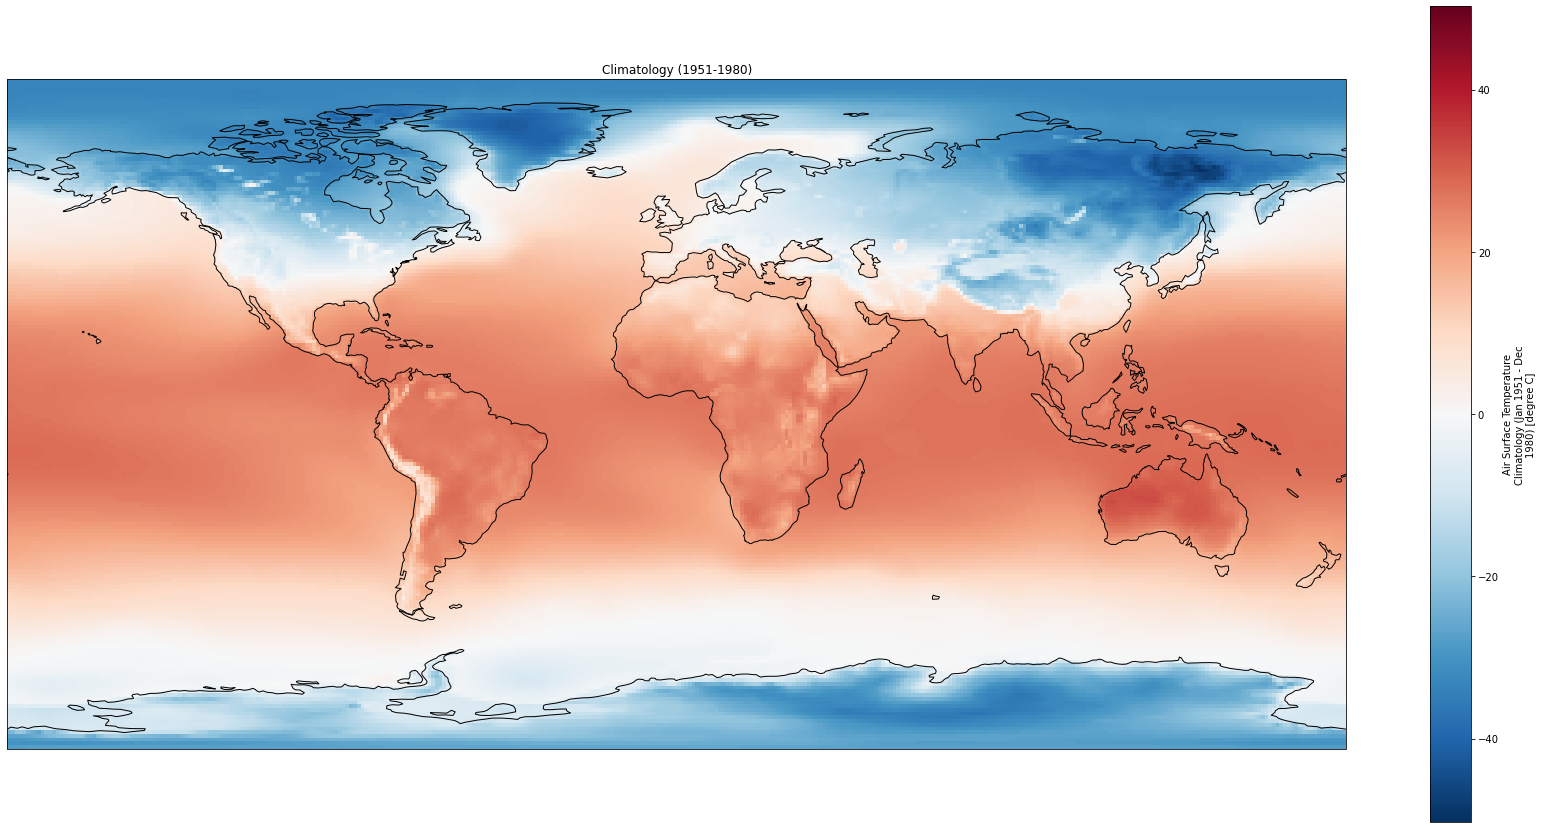

In [115]:
fig = plt.figure(figsize=(30,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
be.climatology[0].plot(ax=ax)
plt.title('Climatology (1951-1980)');

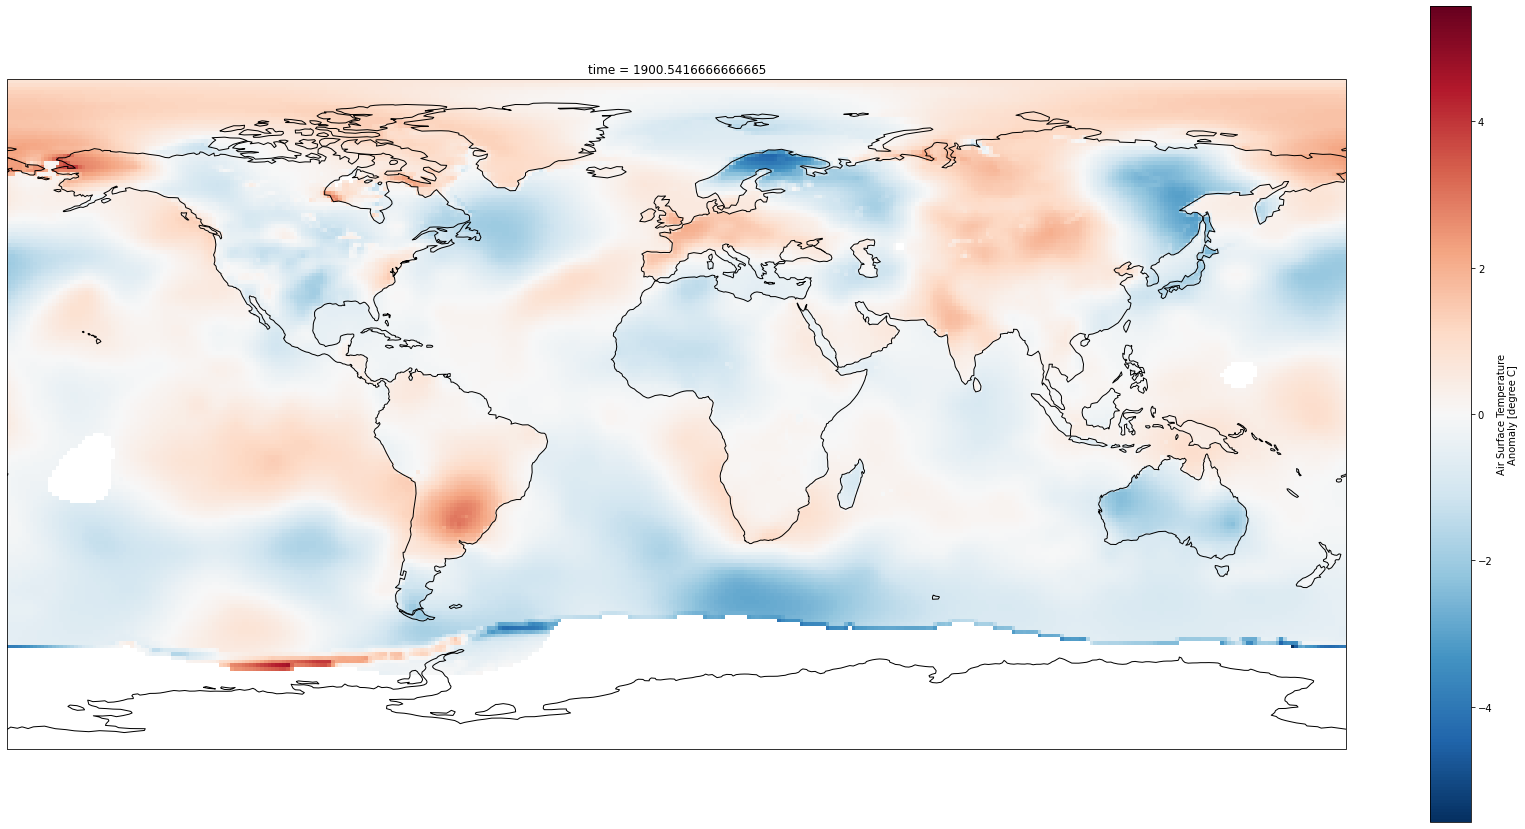

In [116]:
month = 6
year  = 1900
fig = plt.figure(figsize=(30,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
(be.temperature[month+((year-1850)*12)]).plot(ax=ax, clim=[-10, 10])